<a href="https://colab.research.google.com/github/MohWasil/AFG-FTL-Group10/blob/main/Air_pollution_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Air-pollution Quality Prediction**
<br>`Our Scobe`: <br>
In this project we are going to built an air-pollution quality model to classify whether the air we breath is normal, abnormal, dangrous...


In [1]:
# unzip the dataset
# import unrar
# !unzip -q "/content/drive/MyDrive/Air_pollution_project/airollution_dataset.zip" -d "/content/drive/MyDrive/Air_pollution_project"

In [2]:
# Import necessory library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import dataset and check it
data = pd.read_csv("/content/drive/MyDrive/Air_pollution_project/AirQuality.csv", delimiter=';', encoding='utf-8')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [7]:
data['Unnamed: 15']

,Unnamed: 15
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9466,NaN
9467,NaN
9468,NaN
9469,NaN


In [8]:
data['Unnamed: 16']

,Unnamed: 16
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9466,NaN
9467,NaN
9468,NaN
9469,NaN


In [9]:
np.array(data['Unnamed: 15'].isna().sum())

array(9471)

In [10]:
np.array(data['Unnamed: 16'].isna().sum())

array(9471)

In [11]:
# Drop unrelated features
data.drop(['Unnamed: 16', 'Unnamed: 15', 'Date'], axis=1, inplace=True)

In [12]:
data

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# checking for null values inside every feature:
def null_check(dataset):
  total_null = {}
  for feature in dataset.columns:
    total_null[feature] = dataset[feature].isna().sum()

  return total_null

null_values = null_check(data)
null_values

{'Time': 114,
 'CO(GT)': 114,
 'PT08.S1(CO)': 114,
 'NMHC(GT)': 114,
 'C6H6(GT)': 114,
 'PT08.S2(NMHC)': 114,
 'NOx(GT)': 114,
 'PT08.S3(NOx)': 114,
 'NO2(GT)': 114,
 'PT08.S4(NO2)': 114,
 'PT08.S5(O3)': 114,
 'T': 114,
 'RH': 114,
 'AH': 114}

In [14]:
# Check every null values in each feature is the same?
data[data['Time'].isna()]

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# check as boolean for every feature
data[data['Time'].isna()].all()

,0
Time,True
CO(GT),True
PT08.S1(CO),True
NMHC(GT),True
C6H6(GT),True
PT08.S2(NMHC),True
NOx(GT),True
PT08.S3(NOx),True
NO2(GT),True
PT08.S4(NO2),True


In [16]:
# drop null values
data.dropna(inplace=True)

In [17]:
# checking does all null values are dropped correctly?
print(null_check(data))

{'Time': 0, 'CO(GT)': 0, 'PT08.S1(CO)': 0, 'NMHC(GT)': 0, 'C6H6(GT)': 0, 'PT08.S2(NMHC)': 0, 'NOx(GT)': 0, 'PT08.S3(NOx)': 0, 'NO2(GT)': 0, 'PT08.S4(NO2)': 0, 'PT08.S5(O3)': 0, 'T': 0, 'RH': 0, 'AH': 0}


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   object 
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   object 
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   object 
 12  RH             9357 non-null   object 
 13  AH             9357 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.1+ MB


In [19]:
# check for infinity values
np.isinf(data[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]).sum()

,0
PT08.S1(CO),0
NMHC(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [20]:
data

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   object 
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   object 
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   object 
 12  RH             9357 non-null   object 
 13  AH             9357 non-null   object 
dtypes: float64(8), object(6)
memory usage: 1.1+ MB


In [22]:
# converting Object type to Numerical Type
def Co_and_benzene_object_to_float(CO, C6H6, T, RH, AH, dataset):
  dataset[CO] = pd.to_numeric(dataset[CO].str.replace(',', '.')) # Carbon monoxide type convertion
  dataset[C6H6] = pd.to_numeric(dataset[C6H6].str.replace(',', '.')) # Benzene type convertion
  dataset[T] = pd.to_numeric(dataset[T].str.replace(',', '.')) # Temperature type convertion
  dataset[RH] = pd.to_numeric(dataset[RH].str.replace(',', '.')) # Relative Humidity type convertion
  dataset[AH] = pd.to_numeric(dataset[AH].str.replace(',', '.')) # Absolute Humidity type convertion

  return dataset

data = Co_and_benzene_object_to_float('CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH', data)

In [23]:
# Converting Time object type to Numerical
# There is an error in convertion and we need to first make it Datetime standard
# and then convert it to numerical. here is steps of convertion

# Step 1: Replace '.' with ':' to make it a valid time format
data['Time'] = data['Time'].str.replace('.', ':', regex=False)

# Step 2: Convert to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Step 3: Convert to numerical (e.g., seconds since midnight)
data['Seconds'] = data['Time'].dt.hour * 3600 + data['Time'].dt.minute * 60 + data['Time'].dt.second

In [24]:
data

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Seconds
0,1900-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,64800
1,1900-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,68400
2,1900-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,72000
3,1900-01-01 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,75600
4,1900-01-01 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,79200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1900-01-01 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,36000
9353,1900-01-01 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,39600
9354,1900-01-01 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,43200
9355,1900-01-01 13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,46800


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  Seconds        9357 non-null   int32         
dtypes: datetime64[ns](1), floa

In [26]:
# Drop Time feature
data.drop('Time', inplace=True, axis=1)
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Seconds
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,64800
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,68400
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,72000
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,75600
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,79200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,36000
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,39600
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,43200
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,46800


In [27]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Seconds'],
      dtype='object')

**Feature Engineering**

In [28]:
# metrics for label feature
def metrics():
  threshold = {
      'CO(GT)': {
        "Normal": 35,
        "Moderate": 87,
        "Abnormal": 400,
        "Dangerous": 401

      },
    "NMHC(GT)":{
        "Normal": 10,
        "Moderate": 50,
        "Abnormal": 100,
        "Dangerous": 101
    },
    "C6H6(GT)" : {
        "Normal": 2,
        "Moderate": 50,
        "Abnormal": 100,
        "Dangerous": 101
    },
    "NOx(GT)" : {
        "Normal": 10,
        "Moderate": 100,
        "Abnormal": 200,
        "Dangerous": 201

    }
  }

  return threshold

In [29]:
# adding label feature based on threshold
def metric_classify(row, threshold):
  for key, val in threshold.items():
    if key in row:
      value = row[key]
      if value >= val["Dangerous"]:
        return "Dangerous"
      elif value >= val['Abnormal']:
        return 'Abnormal'
      elif value >= val['Moderate']:
        return 'Moderate'
      elif value >= val['Normal']:
        return "Normal"

  return "Normal"

threshold = metrics()
data['Label'] = data.apply(lambda row: metric_classify(row, threshold), axis=1)

In [30]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Seconds,Label
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,64800,Dangerous
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,68400,Dangerous
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,72000,Moderate
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,75600,Moderate
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,79200,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,36000,Normal
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,39600,Normal
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,43200,Normal
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,46800,Normal


In [31]:
# check unique value of label feature
data['Label'].unique()

array(['Dangerous', 'Moderate', 'Normal', 'Abnormal'], dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder
# Convert Label feature to numerical and drop it using OneHotEncoder

def encode_protocol_name(dataset):
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)

    # Extract the 'ProtocolName' column and reshape it to 2D array
    protocol_name_column = dataset[['Label']]

    # Fit and transform the 'ProtocolName' column
    one_hot_encoded = encoder.fit_transform(protocol_name_column)

    # Convert the one-hot encoded array into a DataFrame
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Label']))

    # Drop the original ProtocolName column
    dataset.drop('Label', axis=1, inplace=True)

    # Concatenate the original dataset with the one-hot encoded DataFrame
    dataset = pd.concat([data, one_hot_encoded_df], axis=1)

    return dataset

data = encode_protocol_name(data)
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Seconds,Label_Abnormal,Label_Dangerous,Label_Moderate,Label_Normal
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,64800,0.0,1.0,0.0,0.0
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,68400,0.0,1.0,0.0,0.0
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,72000,0.0,0.0,1.0,0.0
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,75600,0.0,0.0,1.0,0.0
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,79200,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,36000,0.0,0.0,0.0,1.0
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,39600,0.0,0.0,0.0,1.0
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,43200,0.0,0.0,0.0,1.0
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,46800,0.0,0.0,0.0,1.0


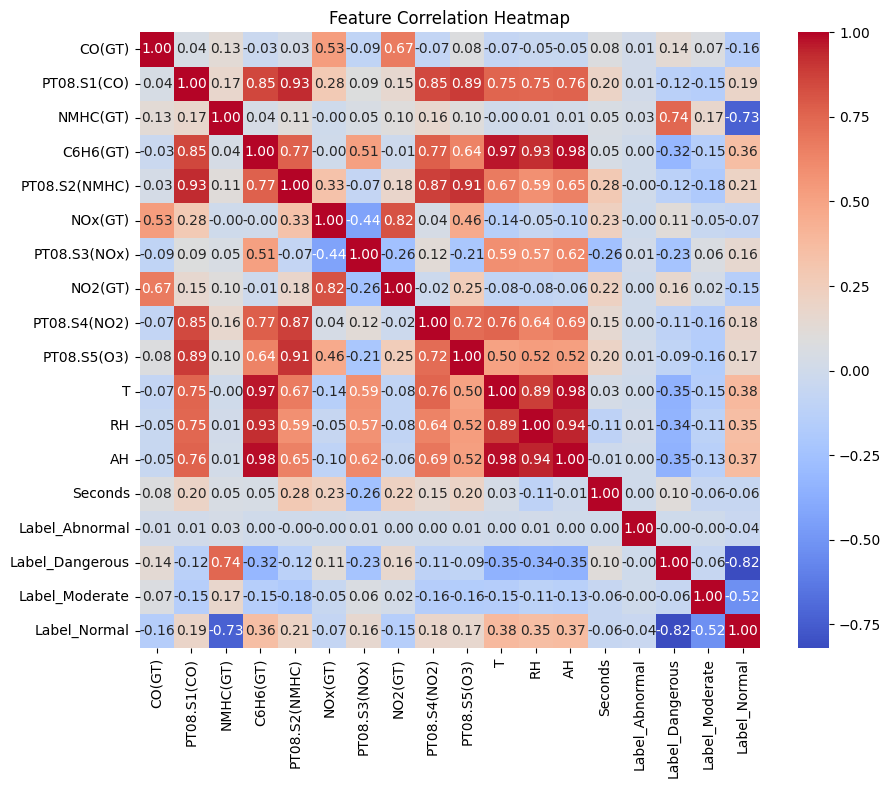

In [33]:
# Correlation matrix
def correlation_matrix():
  # find every feature correlation's
  correlation = data.corr()

  # Create a heatmap using seaborn
  plt.figure(figsize=(10, 8))  # Adjust figure size for better visibility
  sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title("Feature Correlation Heatmap")
  plt.show()

  return

correlation_matrix()

In [38]:
from sklearn.model_selection import train_test_split
# Spliting dataset into train and test:

# Assuming your features are in `X` and target labels are in `y`
X = data.drop(columns=['Label_Normal', 'Label_Abnormal', 'Label_Moderate', 'Label_Dangerous'])  # independet features
y = data[['Label_Normal', 'Label_Abnormal', 'Label_Moderate', 'Label_Dangerous']]  # dependent labels

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 7485 samples
Testing set size: 1872 samples


In [39]:
# # Train the model using K Nearest Neighbor, RandomForest and Naive Bayes
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
# from sklearn.preprocessing import LabelBinarizer

# def train_and_evaluate_models(X_train, X_test, y_train, y_test):
#     # Initialize the models
#     models = {
#         'KNN': KNeighborsClassifier(n_neighbors=5),
#         'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#         'Naive Bayes': GaussianNB()
#     }

#     # Loop over each model, train it, and evaluate its performance
#     for model_name, model in models.items():
#         print(f"Training {model_name}...")
#         model.fit(X_train, y_train)  # Train each model
#         y_pred = model.predict(X_test)  # Make predictions on the test set

#         # Calculate accuracy
#         accuracy = accuracy_score(y_test, y_pred)
#         print(f"Accuracy of {model_name}: {accuracy:.4f}")

#         # Print classification report
#         print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

#         # Confusion Matrix
#         print(f"Confusion Matrix for {model_name}:")
#         cm = confusion_matrix(y_test, y_pred)
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
#         plt.title(f"Confusion Matrix - {model_name}")
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.show()

#         # AUC (Only for binary classification or multiclass with OneVsRest)
#         if len(model.classes_) == 2:  # For binary classification
#             fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
#             auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#             print(f"AUC (Area Under Curve) for {model_name}: {auc:.4f}")
#             plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
#             plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
#             plt.title(f"ROC Curve - {model_name}")
#             plt.xlabel('False Positive Rate')
#             plt.ylabel('True Positive Rate')
#             plt.legend(loc='best')
#             plt.show()
#         else:  # For multiclass classification
#             print(f"AUC (One-vs-Rest) for {model_name}:")
#             lb = LabelBinarizer()
#             y_bin = lb.fit_transform(y_test)
#             auc = roc_auc_score(y_bin, model.predict_proba(X_test), average='macro', multi_class='ovr')
#             print(f"AUC (Area Under Curve) for {model_name}: {auc:.4f}")

#         print("-" * 80)  # Print separator for clarity

# train_and_evaluate_models(X_train, X_test, y_train, y_test)


Training KNN...
Accuracy of KNN: 0.9621
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1645
           1       0.00      0.00      0.00         1
           2       0.65      0.48      0.55        71
           3       0.90      0.90      0.90       155

   micro avg       0.97      0.96      0.97      1872
   macro avg       0.64      0.59      0.61      1872
weighted avg       0.97      0.96      0.96      1872
 samples avg       0.96      0.96      0.96      1872

Confusion Matrix for KNN:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multilabel-indicator is not supported

Training KNN...
Accuracy of KNN: 0.9663
Classification Report for KNN:
                 precision    recall  f1-score   support

 Label_Abnormal       0.00      0.00      0.00         1
Label_Dangerous       0.86      0.94      0.90       155
 Label_Moderate       0.64      0.52      0.57        71
   Label_Normal       0.99      0.99      0.99      1645

       accuracy                           0.97      1872
      macro avg       0.62      0.61      0.62      1872
   weighted avg       0.96      0.97      0.96      1872

Confusion Matrix for KNN:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


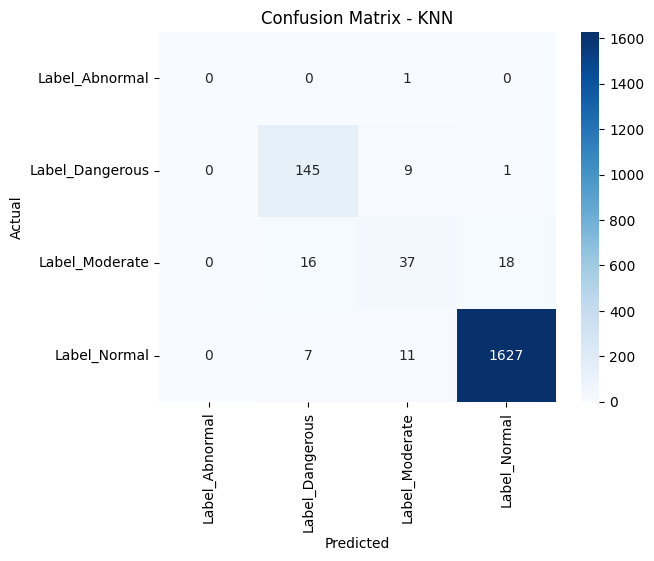

AUC (One-vs-Rest) for KNN:
AUC (Area Under Curve) for KNN: 0.8485
--------------------------------------------------------------------------------
Training Random Forest...
Accuracy of Random Forest: 0.9979
Classification Report for Random Forest:
                 precision    recall  f1-score   support

 Label_Abnormal       0.00      0.00      0.00         1
Label_Dangerous       1.00      1.00      1.00       155
 Label_Moderate       0.99      0.96      0.97        71
   Label_Normal       1.00      1.00      1.00      1645

       accuracy                           1.00      1872
      macro avg       0.75      0.74      0.74      1872
   weighted avg       1.00      1.00      1.00      1872

Confusion Matrix for Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


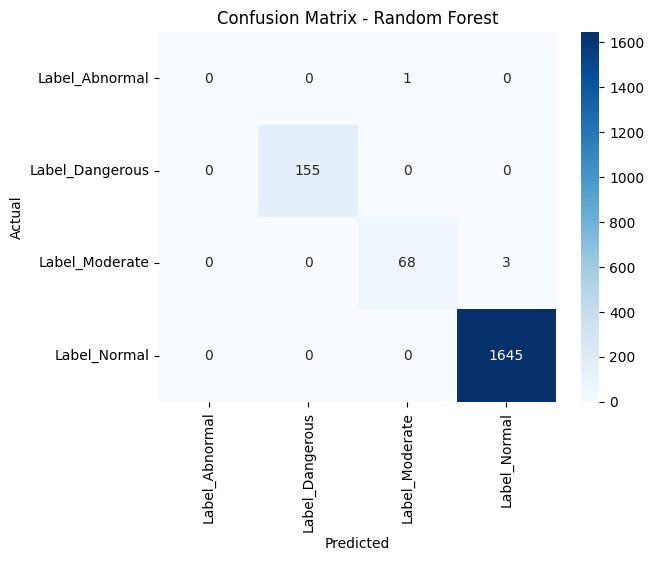

AUC (One-vs-Rest) for Random Forest:
AUC (Area Under Curve) for Random Forest: 0.9975
--------------------------------------------------------------------------------
Training Naive Bayes...
Accuracy of Naive Bayes: 0.9418
Classification Report for Naive Bayes:
                 precision    recall  f1-score   support

 Label_Abnormal       0.00      0.00      0.00         1
Label_Dangerous       0.79      0.85      0.82       155
 Label_Moderate       0.40      0.58      0.47        71
   Label_Normal       0.99      0.97      0.98      1645

       accuracy                           0.94      1872
      macro avg       0.55      0.60      0.57      1872
   weighted avg       0.95      0.94      0.95      1872

Confusion Matrix for Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


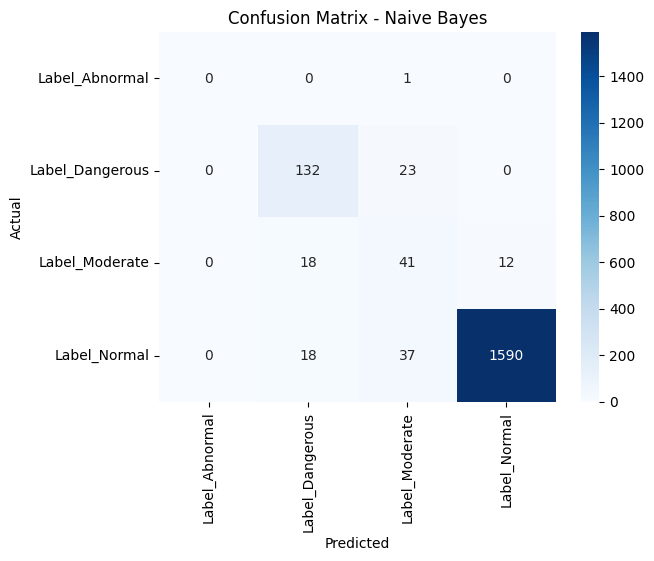

AUC (One-vs-Rest) for Naive Bayes:
AUC (Area Under Curve) for Naive Bayes: 0.8501
--------------------------------------------------------------------------------


In [40]:
# Train the model using K Nearest Neighbor, RandomForest, and Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Convert y_train and y_test from one-hot encoded to label format
    y_train_labels = y_train.idxmax(axis=1)  # Get the column with the max value for training
    y_test_labels = y_test.idxmax(axis=1)    # Get the column with the max value for testing

    # Initialize the models
    models = {
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Naive Bayes': GaussianNB()
    }

    # Loop over each model, train it, and evaluate its performance
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train_labels)  # Train each model using the labels
        y_pred = model.predict(X_test)  # Make predictions on the test set

        # Calculate accuracy
        accuracy = accuracy_score(y_test_labels, y_pred)
        print(f"Accuracy of {model_name}: {accuracy:.4f}")

        # Print classification report
        print(f"Classification Report for {model_name}:\n{classification_report(y_test_labels, y_pred)}")

        # Confusion Matrix
        print(f"Confusion Matrix for {model_name}:")
        cm = confusion_matrix(y_test_labels, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f"Confusion Matrix - {model_name}")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # AUC (Only for binary classification or multiclass with OneVsRest)
        if len(model.classes_) == 2:  # For binary classification
            fpr, tpr, thresholds = roc_curve(y_test_labels, model.predict_proba(X_test)[:, 1])
            auc = roc_auc_score(y_test_labels, model.predict_proba(X_test)[:, 1])
            print(f"AUC (Area Under Curve) for {model_name}: {auc:.4f}")
            plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
            plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
            plt.title(f"ROC Curve - {model_name}")
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='best')
            plt.show()
        else:  # For multiclass classification
            print(f"AUC (One-vs-Rest) for {model_name}:")
            lb = LabelBinarizer()
            y_bin = lb.fit_transform(y_test_labels)  # Binarize the labels for multiclass
            auc = roc_auc_score(y_bin, model.predict_proba(X_test), average='macro', multi_class='ovr')
            print(f"AUC (Area Under Curve) for {model_name}: {auc:.4f}")

        print("-" * 80)  # Print separator for clarity

# Call the function with your data
train_and_evaluate_models(X_train, X_test, y_train, y_test)